In [ ]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO

In [ ]:
#Class, Library, Package - 대문자 관례
#지역변수, 파라메타 - 소문자 관례
#addr, msg 등 줄임말은 배제. 변수명이 길어도 명확한 의미 전달이 중요.
#두 단어가 합쳐지면 두 번째 단어는 대문자
#상수는 전체가 대문자 ex) const MAX_USER = 100

In [ ]:
subscription_key = ''
face_api_url = ''
image_url = 'http://newsimg.hankookilbo.com/2017/06/05/201706051276869385_1.jpg'

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))

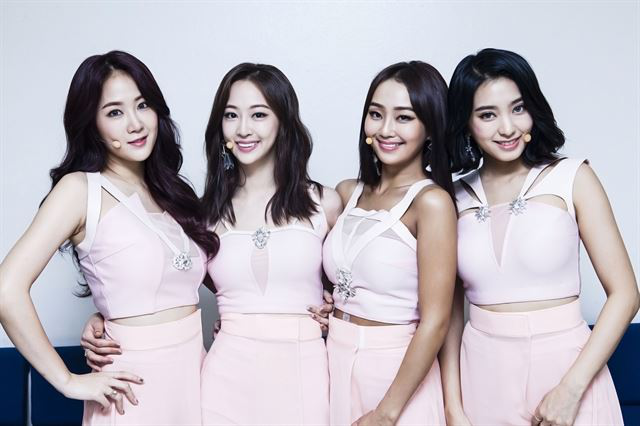

In [ ]:
image

In [ ]:
headers = {'Ocp-Apim-Subscription-Key' : subscription_key}

In [ ]:
params = {
  'returnFaceID' : 'false',
  'returnFaceLandmarks' : 'false',
  'returnFaceAttributes' : 'Smile'  
}

In [ ]:
data = {'url': image_url}

In [ ]:
response = requests.post(face_api_url, params=params, headers=headers, json=data)
faces = response.json()
faces

[{'faceRectangle': {'top': 92, 'left': 101, 'width': 64, 'height': 64},
  'faceAttributes': {'smile': 0.931}},
 {'faceRectangle': {'top': 93, 'left': 473, 'width': 64, 'height': 64},
  'faceAttributes': {'smile': 1.0}},
 {'faceRectangle': {'top': 100, 'left': 356, 'width': 62, 'height': 62},
  'faceAttributes': {'smile': 1.0}},
 {'faceRectangle': {'top': 99, 'left': 217, 'width': 58, 'height': 58},
  'faceAttributes': {'smile': 1.0}}]

In [ ]:
draw = ImageDraw.Draw(image)

In [ ]:
def DrawBox(faces):

  for face in faces:
    rect = face['faceRectangle']
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']

    draw.rectangle(((left,top),(left+width,top+height)),outline='red')

    face_attributes = face['faceAttributes']
    smile = face_attributes['smile']
    draw.text((left,top),str(smile),fill='red')

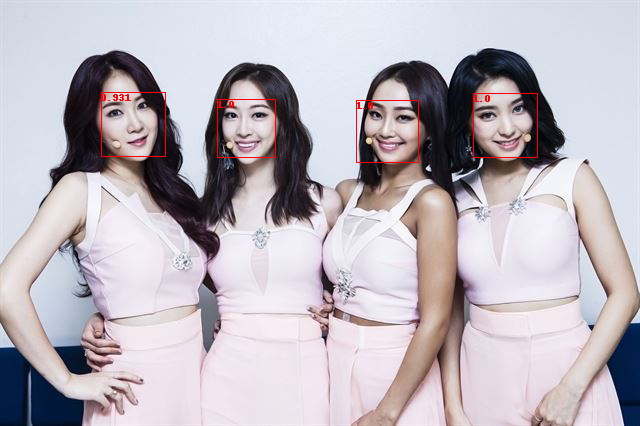

In [ ]:
DrawBox(faces)
image